In [1]:
# Agrega la carpeta raíz del proyecto al path para importar módulos desde src/
import sys
import os

proyecto_root = os.path.abspath(os.path.join(".."))  # subir desde notebooks/ a raíz del proyecto
if proyecto_root not in sys.path:
    sys.path.append(proyecto_root)


In [2]:
from src.preprocessing import load_data, clean_data, feature_engineering, scale_and_split
from src.modeling import train_model, evaluate_model, plot_confusion_matrix, plot_feature_importances, save_model


In [3]:
# Ruta al archivo CSV con los datos simulados
data_path = "../data/raw/sensor_data.csv"

# Proceso completo de preprocesamiento de datos
df = load_data(data_path)
df = clean_data(df)
df = feature_engineering(df)
X_train_scaled, X_test_scaled, y_train, y_test = scale_and_split(df, target='falla')


In [4]:
# Entrenamiento del modelo usando los datos escalados
modelo = train_model(X_train_scaled, y_train)


d:\gzo\myProjects\dataAnalyst\environments\real_time_predictive_monitoring\lib\site-packages\xgboost\core.py:158: UserWarning: [12:54:50] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [5]:
# Evaluación y métricas de desempeño
resultados = evaluate_model(modelo, X_test_scaled, y_test)

# Imprimir reporte de clasificación
print("✅ Reporte de Clasificación:")
print(resultados['classification_report'])


✅ Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       953
           1       0.96      1.00      0.98        47

    accuracy                           1.00      1000
   macro avg       0.98      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000



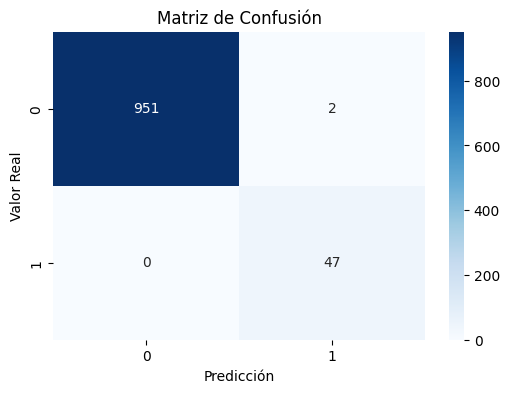

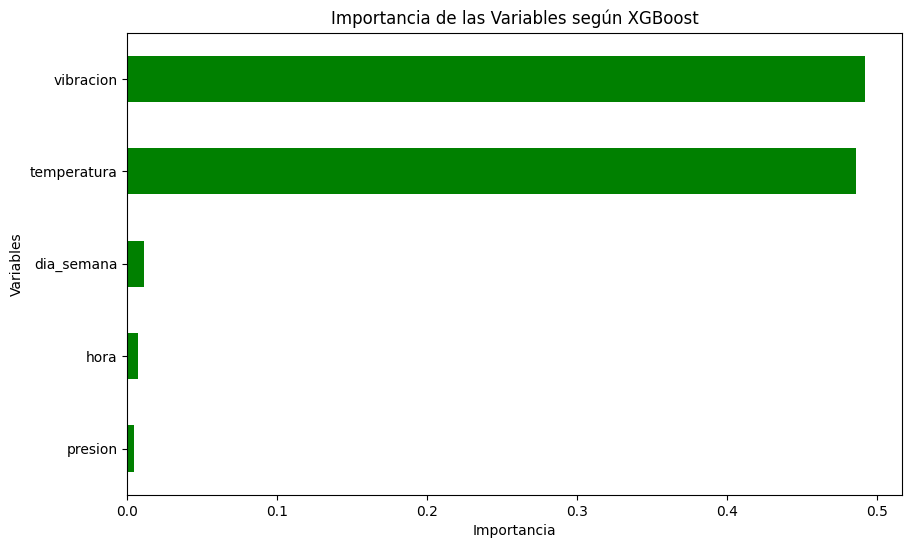

In [6]:
# Visualizar matriz de confusión
plot_confusion_matrix(resultados['confusion_matrix'])

# Visualizar importancia de variables
plot_feature_importances(modelo, X_train_scaled.columns)


In [7]:
# Guardar el modelo en archivo .pkl para uso futuro (API y dashboard)
save_model(modelo, "../models/modelo_xgboost.pkl")
print("✅ Modelo guardado correctamente.")


✅ Modelo guardado correctamente.
